# Establish Need for Improvement over Baselines.

## Q8: How does a pretrained ResNet embed these behaviors? (Species-Aware)

In [1]:
"""
Externals
"""
import torch
import numpy as np
from novel_swarms.results.results import main as base_results
from novel_swarms.config.defaults import ConfigurationDefaults
from novel_swarms.novelty.NoveltyArchive import NoveltyArchive
from data.swarmset import SwarmDataset
from src.networks.network_wrapper import NetworkWrapper, ResNetWrapper
from src.training.labels import LabelSet
from src.constants import SINGLE_SENSOR_WORLD_CONFIG, TWO_SENSOR_WORLD_CONFIG
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

"""
Import Pretrained Model
"""
arch = NoveltyArchive()
network = ResNetWrapper().to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

pygame-ce 2.2.1 (SDL 2.26.4, Python 3.10.6)


/home/connor/Desktop/research/SwarmNoveltyNetwork/.env/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/connor/Desktop/research/SwarmNoveltyNetwork/.env/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet Init with 512


In [2]:
"""
Q4 Assumes that there was a linearly compiled dataset (see create_dataset.py)
"""
out = ""
NUM_PER = 1
for i in range(18):
    for j in range(NUM_PER):
        out += f"{(i * NUM_PER) + j}, {i}\n"

with open("../../../data/oracle/mrs-q6-labels.txt", "w") as f:
    f.write(out)

In [3]:
"""
Load Data
"""
heterogeneous_dataset = SwarmDataset("../../../data/mrs-q6-samples", rank=0, color=True)
labels = LabelSet("../../../data/oracle/mrs-q4-labels.txt")

In [4]:
"""
Embed
"""

heterogeneous_archive = NoveltyArchive()
for i in range(len(heterogeneous_dataset)):
    image, controller, behavior = heterogeneous_dataset[i][0], heterogeneous_dataset[i][1], heterogeneous_dataset[i][2]
    # image = np.expand_dims(image, axis=2)
    print(image.shape)
    embed = network.batch_out(image)
    embed = embed.detach().cpu().squeeze(dim=0).numpy()

    # Uncomment for Network Analysis (Mattson & Brown)
    heterogeneous_archive.addToArchive(embed, controller)

    # Uncomment for B-Vector Analysis (Brown et al.)
    # if not np.isnan(np.sum(behavior)):
    #     heterogeneous_archive.addToArchive(behavior, controller)

classes = ["Segments", "Nucleus", "Containment", "Spiral", "Nested Cycles", "Perimeter", "Site Traversal", "Flail", "Hurricane", "Snake", "Leader", "Dipole", "Aggregation", "Cyclic Pursuit", "Dispersal", "Milling", "Wall Following", "Random"]
print(labels.color_map)
labels.set_color(17, (0.8, 0.8, 0.8))

colors = labels.get_colors()
l = [classes[i] for i in labels.get_labels()]
embeddings = heterogeneous_archive.archive

(50, 50, 3)
torch.Size([1, 3, 200, 200])
Final Shape: torch.Size([1, 3, 200, 200])
(50, 50, 3)
torch.Size([1, 3, 200, 200])
Final Shape: torch.Size([1, 3, 200, 200])
(50, 50, 3)
torch.Size([1, 3, 200, 200])
Final Shape: torch.Size([1, 3, 200, 200])
(50, 50, 3)
torch.Size([1, 3, 200, 200])
Final Shape: torch.Size([1, 3, 200, 200])
(50, 50, 3)
torch.Size([1, 3, 200, 200])
Final Shape: torch.Size([1, 3, 200, 200])
(50, 50, 3)
torch.Size([1, 3, 200, 200])
Final Shape: torch.Size([1, 3, 200, 200])
(50, 50, 3)
torch.Size([1, 3, 200, 200])
Final Shape: torch.Size([1, 3, 200, 200])
(50, 50, 3)
torch.Size([1, 3, 200, 200])
Final Shape: torch.Size([1, 3, 200, 200])
(50, 50, 3)
torch.Size([1, 3, 200, 200])
Final Shape: torch.Size([1, 3, 200, 200])
(50, 50, 3)
torch.Size([1, 3, 200, 200])
Final Shape: torch.Size([1, 3, 200, 200])
(50, 50, 3)
torch.Size([1, 3, 200, 200])
Final Shape: torch.Size([1, 3, 200, 200])
(50, 50, 3)
torch.Size([1, 3, 200, 200])
Final Shape: torch.Size([1, 3, 200, 200])
(50,

In [5]:
"""
Dimensionality Reduction (t-SNE)
"""
reduced = TSNE(
    n_components=2,
    learning_rate="auto",
    init="pca",
    perplexity=30,
    early_exaggeration=2
).fit_transform(embeddings)

/home/connor/Desktop/research/SwarmNoveltyNetwork/.env/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


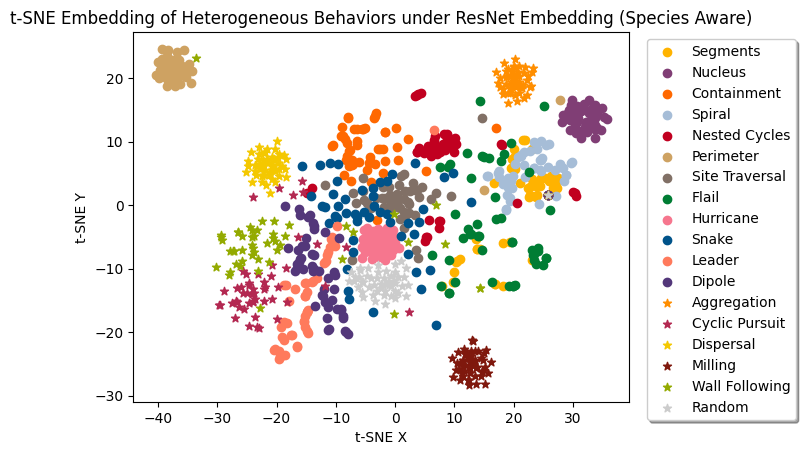

In [7]:
"""
Visualize (MatPlotLib)
"""
lim = len(embeddings)
x = [reduced[i][0] for i in range(lim)]
y = [reduced[i][1] for i in range(lim)]

for _x, _y, _l, _c in zip(x, y, labels.get_labels(), colors):
    plt.scatter(_x, _y, c=[_c], cmap="rgb", marker="o" if _l < 12 else "*")

# Add Legend Labels (Hacky)
for i in range(len(classes)):
    plt.scatter(x[0], y[0], c=[list(labels.color_map.values())[i]], label=classes[i], marker="o" if i < 12 else "*")

plt.title("t-SNE Embedding of Heterogeneous Behaviors under ResNet Embedding (Species Aware)")
plt.xlabel("t-SNE X")
plt.ylabel("t-SNE Y")
plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1.0),
          ncol=1, fancybox=True, shadow=True)
plt.show()